In [2]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

In [4]:
img1 = io.imread('img1.jpg')
img2 = io.imread('img2.jpg')
df=pd.DataFrame(['img1','img2'],columns=['Image'])
print(img1.shape,img2.shape)

(630, 1200, 3) (350, 642, 3)


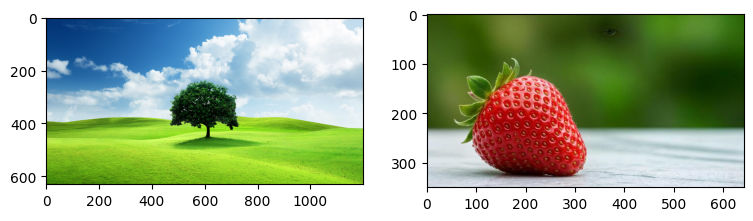

In [3]:
fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax2=fig.add_subplot(1,2,2)
ax2.imshow(img2)

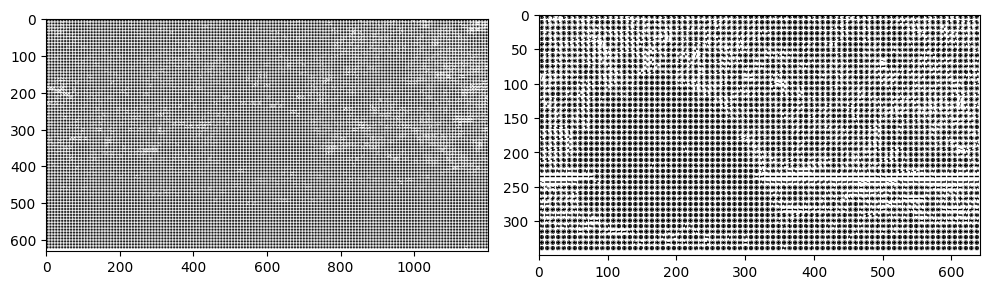

In [7]:
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2


fd1, hog_vis1 = hog(img1, 
                    orientations=8, 
                    pixels_per_cell=(8, 8), 
                    cells_per_block=(3, 3), 
                    visualize=True,
                    channel_axis=-1)

fd2, hog_vis2 = hog(img2, 
                    orientations=8, 
                    pixels_per_cell=(8, 8), 
                    cells_per_block=(3, 3), 
                    visualize=True, 
                    channel_axis=-1)


img1_hogs = exposure.rescale_intensity(hog_vis1, in_range=(0, 0.04))
img2_hogs = exposure.rescale_intensity(hog_vis2, in_range=(0, 0.04))

# Visualization
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img1_hogs, cmap='binary')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img2_hogs, cmap='binary')

plt.tight_layout()
plt.show()

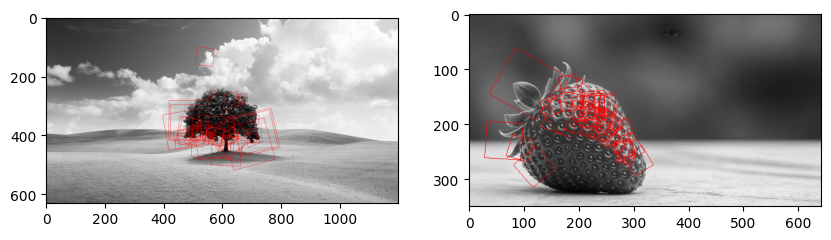

In [8]:
import mahotas as mh
from mahotas.features import surf

img1_mh = mh.colors.rgb2gray(img1)
img2_mh = mh.colors.rgb2gray(img2)

img1_surf = surf.surf(img1_mh, nr_octaves=8, nr_scales=16, 
                      initial_step_size=1, threshold=0.1, max_points=50)
img2_surf = surf.surf(img2_mh, nr_octaves=8, nr_scales=16, 
                      initial_step_size=1, threshold=0.1, max_points=50)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(surf.show_surf(img1_mh, img1_surf))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(surf.show_surf(img2_mh, img2_surf))

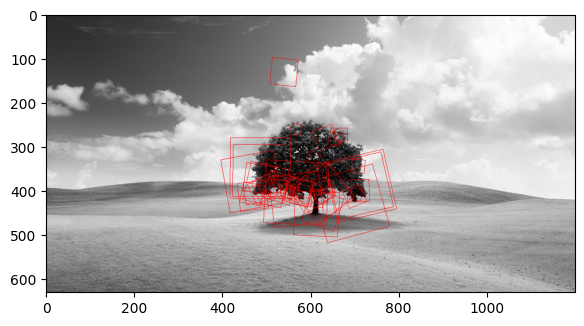

In [9]:
new_img1 = io.imread('img1.jpg')
newimg1_mh = mh.colors.rgb2gray(new_img1)
newimg1_surf = surf.surf(newimg1_mh, nr_octaves=8, nr_scales=16,
initial_step_size=1, threshold=0.1, max_points=50)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(surf.show_surf(newimg1_mh, newimg1_surf))

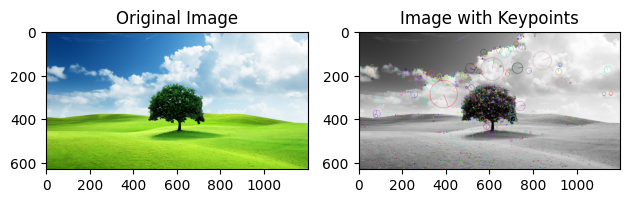

In [10]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('img1.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
result_image = cv2.drawKeypoints(gray_image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Display the image with keypoints
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Keypoints")

plt.tight_layout()
plt.show()

(<Axes: title={'center': 'Canny image'}>,
 Text(0.5, 1.0, 'Canny image'))

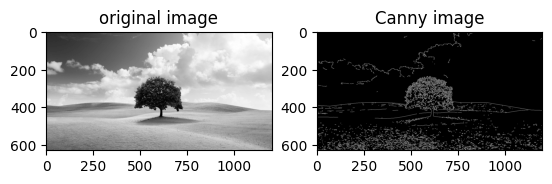

In [11]:
canny_filter=cv2.Canny(gray_image, 100,150)

plt.subplot(1,2,1),plt.imshow(gray_image,cmap='gray'),plt.title("original image")
plt.subplot(1,2,2),plt.imshow(canny_filter,cmap='gray'),plt.title("Canny image")

(<Axes: title={'center': 'Vertical image'}>,
 Text(0.5, 1.0, 'Vertical image'))

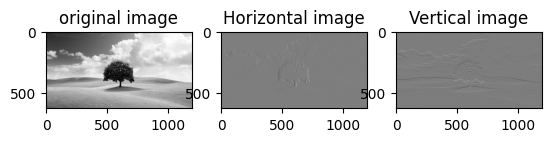

In [12]:
img1=cv2.Sobel(gray_image, cv2.CV_64F,1,0,5)
img2=cv2.Sobel(gray_image, cv2.CV_64F,0,1,5)

plt.subplot(1,3,1),plt.imshow(gray_image,cmap='gray'),plt.title("original image")
plt.subplot(1,3,2),plt.imshow(img1,cmap='gray'),plt.title("Horizontal image")
plt.subplot(1,3,3),plt.imshow(img2,cmap='gray'),plt.title("Vertical image")

Text(0.5, 1.0, 'Laplacian Image')

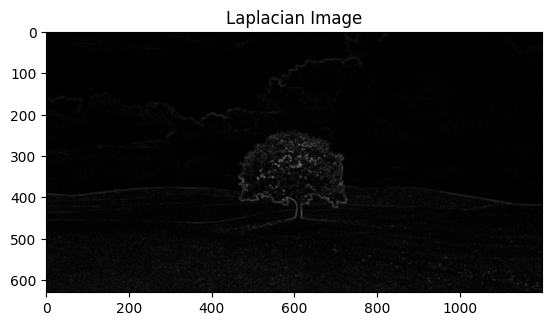

In [13]:
# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Apply Laplacian filter
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# Convert to absolute values
laplacian_abs = cv2.convertScaleAbs(laplacian)

plt.imshow(laplacian_abs, cmap="gray")
plt.title("Laplacian Image")